In [1]:
#pip install seaborn

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 24 09:47:55 2021

@author: u6026797
Jaden Arnold 
u1172058 
"""
#%% libraries
import pandas as pd
import matplotlib.pyplot as plt
#%% data

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

#%% Instructions
'''
Overall instructions:
As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.
'''


'\nOverall instructions:\nAs described in the homework description, each graphic you make must:\n   1. Have a thoughtful title\n   2. Have clearly labelled axes \n   3. Be legible\n   4. Not be a pie chart\nI should be able to run your .py file and recreate the graphics without error.\nAs per usual, any helper variables or columns you create should be thoughtfully\nnamed.\n'

         iso2 iso3  code3     FIPS      Admin2 Province_State Country_Region  \
UID                                                                            
84001001   US  USA    840   1001.0     Autauga        Alabama             US   
84001003   US  USA    840   1003.0     Baldwin        Alabama             US   
84001005   US  USA    840   1005.0     Barbour        Alabama             US   
84001007   US  USA    840   1007.0        Bibb        Alabama             US   
84001009   US  USA    840   1009.0      Blount        Alabama             US   
...       ...  ...    ...      ...         ...            ...            ...   
84056039   US  USA    840  56039.0       Teton        Wyoming             US   
84056041   US  USA    840  56041.0       Uinta        Wyoming             US   
84090056   US  USA    840  90056.0  Unassigned        Wyoming             US   
84056043   US  USA    840  56043.0    Washakie        Wyoming             US   
84056045   US  USA    840  56045.0      

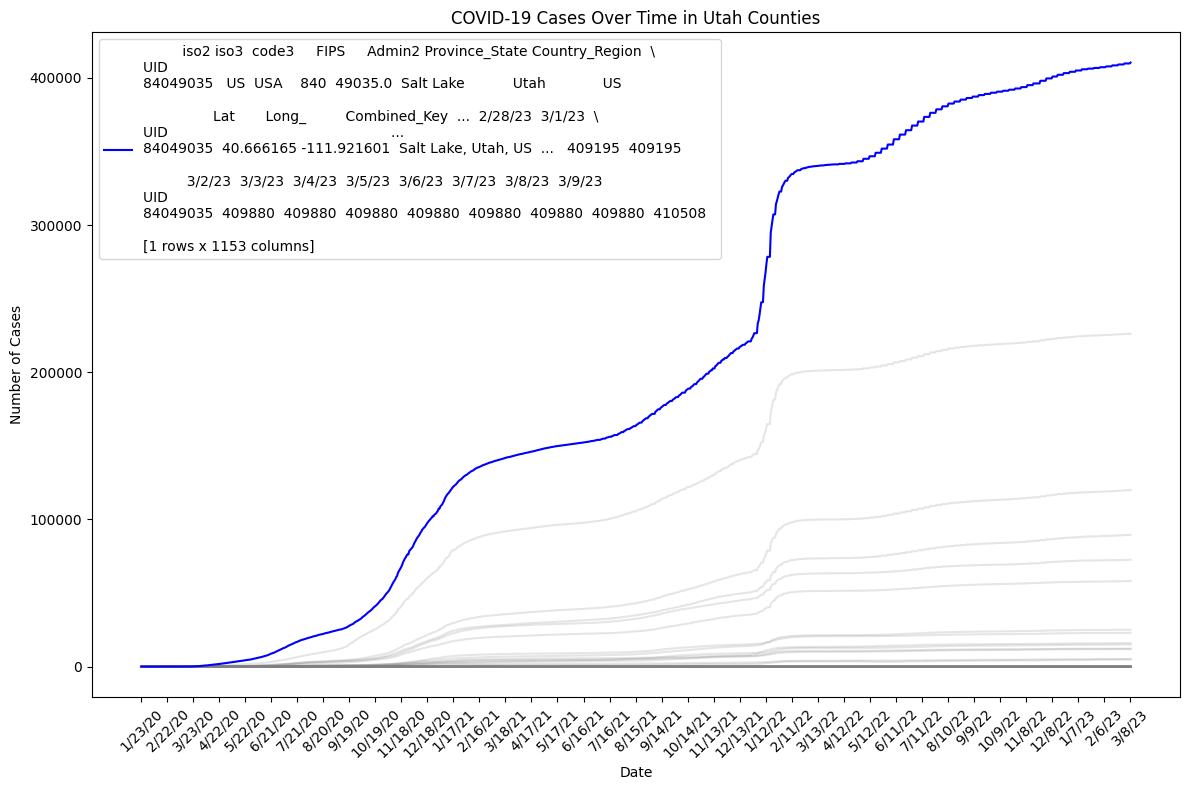

In [2]:
#%% viz 1
'''
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis
'''
print(covid_df)
#intial print of data frame to understand the data 

utah_counties= covid_df[covid_df['Province_State']=='Utah']
#find dates
#dates are in the 11 column 
dates= utah_counties.columns[11:]
#find salt lake county to highlight that specific data 
Salt_lake= 'Salt Lake' 
#plot figure in grey 
plt.figure (figsize=(12,8))
#plot in grey color 
for index, row in utah_counties.iterrows(): 
    if row['Admin2']!= Salt_lake: 
        plt.plot(dates, row[11:], color='grey', alpha=0.2)

#use different color for salt lake 
Salt_lake= utah_counties[utah_counties['Admin2']== Salt_lake]
plt.plot(dates, Salt_lake.values.flatten()[11:], color='blue', label= Salt_lake)
#formatting 
plt.xticks(range(0, len(dates), 30), dates[::30], rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Over Time in Utah Counties')
plt.legend()
plt.tight_layout()

plt.show()

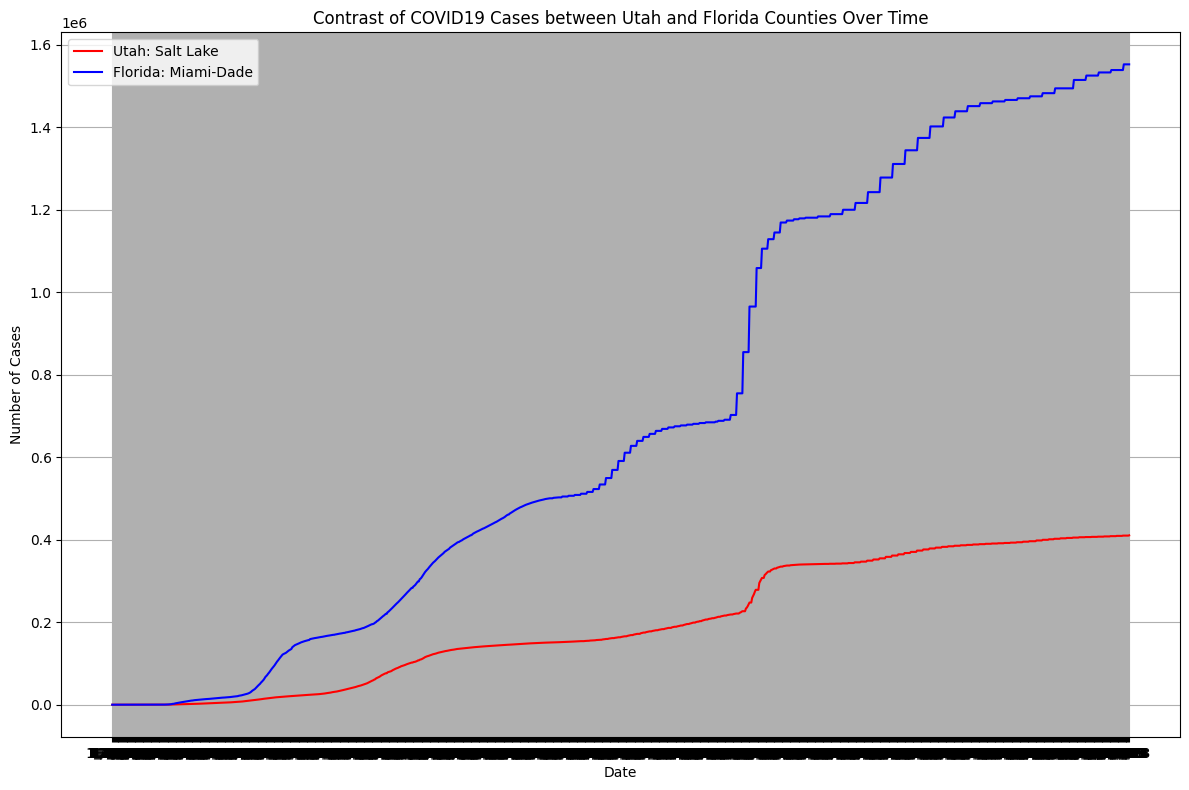

In [3]:

#%% viz 2
'''
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
'''
# Filter data for Utah and Florida
utah_counties = covid_df[covid_df['Province_State'] == 'Utah']
florida_counties = covid_df[covid_df['Province_State'] == 'Florida']

# Extract data columns
utah_cases_columns = utah_counties.columns[11:]
utah_cases_columns_numeric = utah_counties[utah_cases_columns].select_dtypes(include='int64').columns

florida_cases_columns = florida_counties.columns[11:]
florida_cases_columns_numeric = florida_counties[florida_cases_columns].select_dtypes(include='int64').columns

# Get the county in Utah with the most cases
utah_max_cases_county = utah_counties.loc[utah_counties[utah_cases_columns_numeric].sum(axis=1).idxmax()]

# do same with florida
florida_max_cases_county = florida_counties.loc[florida_counties[florida_cases_columns_numeric].sum(axis=1).idxmax()]

# Extract date-wise case data 
utah_cases = utah_max_cases_county[utah_cases_columns_numeric].values
utah_dates = utah_max_cases_county[utah_cases_columns_numeric].index

florida_cases = florida_max_cases_county[florida_cases_columns_numeric].values
florida_dates = florida_max_cases_county[florida_cases_columns_numeric].index

# plot figure
plt.figure(figsize=(12, 8))

plt.plot(utah_dates, utah_cases, label=f"Utah: {utah_max_cases_county['Admin2']}", color='red')
plt.plot(florida_dates, florida_cases, label=f"Florida: {florida_max_cases_county['Admin2']}", color='blue')

# Highlight the difference between the two counties
min_length = min(len(utah_dates), len(florida_dates))
utah_cases = utah_cases[:min_length]
florida_cases = florida_cases[:min_length]
#I get an error trying to highlight the differences between the two- this is what i tried 

#plt.fill_between(utah_dates[:min_length], utah_cases, florida_cases, where=(utah_cases > florida_cases), facecolor='green', alpha=0.3)
#plt.fill_between(utah_dates[:min_length], utah_cases, florida_cases, where=(utah_cases < florida_cases),
                 #facecolor='green', alpha=0.3)

# Formatting
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Contrast of COVID19 Cases between Utah and Florida Counties Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


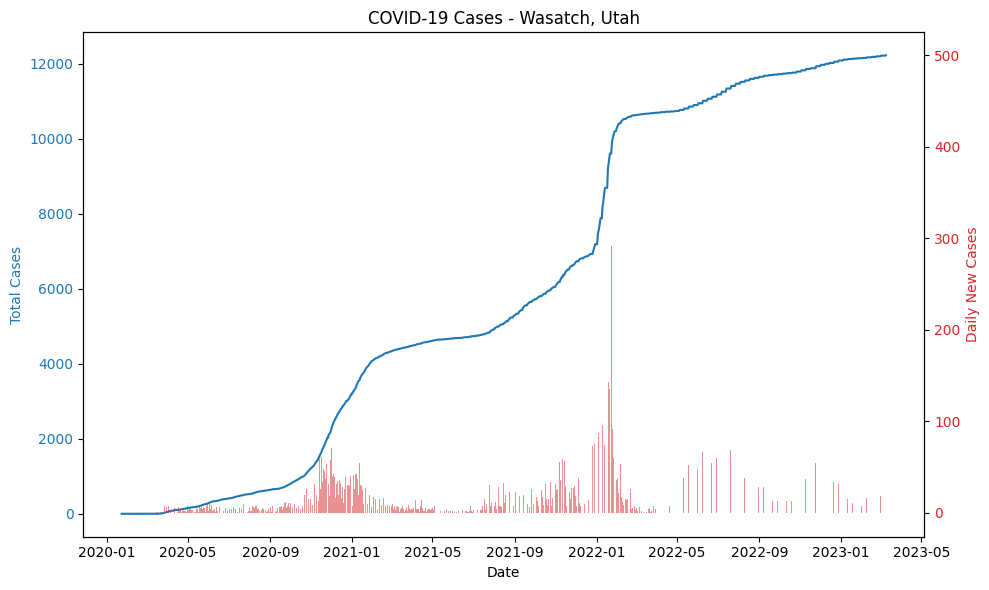

In [4]:
#%% viz 3
'''
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
'''

# This is my home county- Wasatch County, Utah 
#Learned that filter process is much easier to keep these as county and state name 
#so you can switch these as necessary without having to rewrite multiple variables 
county_name = 'Wasatch'
state_name = 'Utah'

# Filter data 
county_data = covid_df[(covid_df['Admin2'] == county_name) & (covid_df['Province_State'] == state_name)]

# Extract date columns and corresponding cases
dates = county_data.columns[11:]
cases = county_data.iloc[0, 11:].values.astype(int)

# Calculate daily cases
daily_new_cases = [cases[i + 1] - cases[i] if i < len(cases) - 1 else 0 for i in range(len(cases))]

#date formatting I got an error without doing this 
formatted_dates = pd.to_datetime(dates, format='%m/%d/%y')

# Plot figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# formatting of the figure figure axis is for total cases 
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.plot(formatted_dates, cases, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# formatting for the new cases 
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Daily New Cases', color=color)
ax2.bar(formatted_dates, daily_new_cases, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

# rotation for readability 
plt.xticks(rotation=45)

# extra formating things that I hadn't done yet
plt.title(f'COVID-19 Cases - {county_name}, {state_name}')
plt.tight_layout()
plt.show()




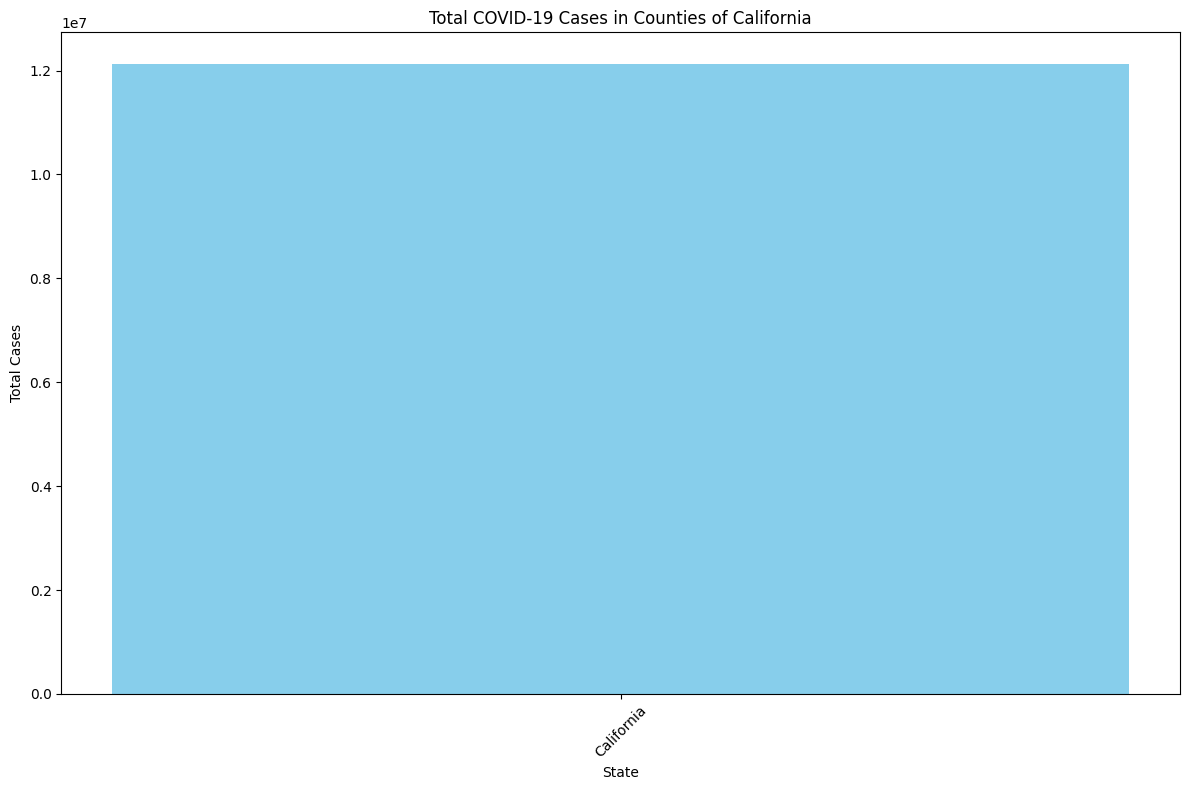

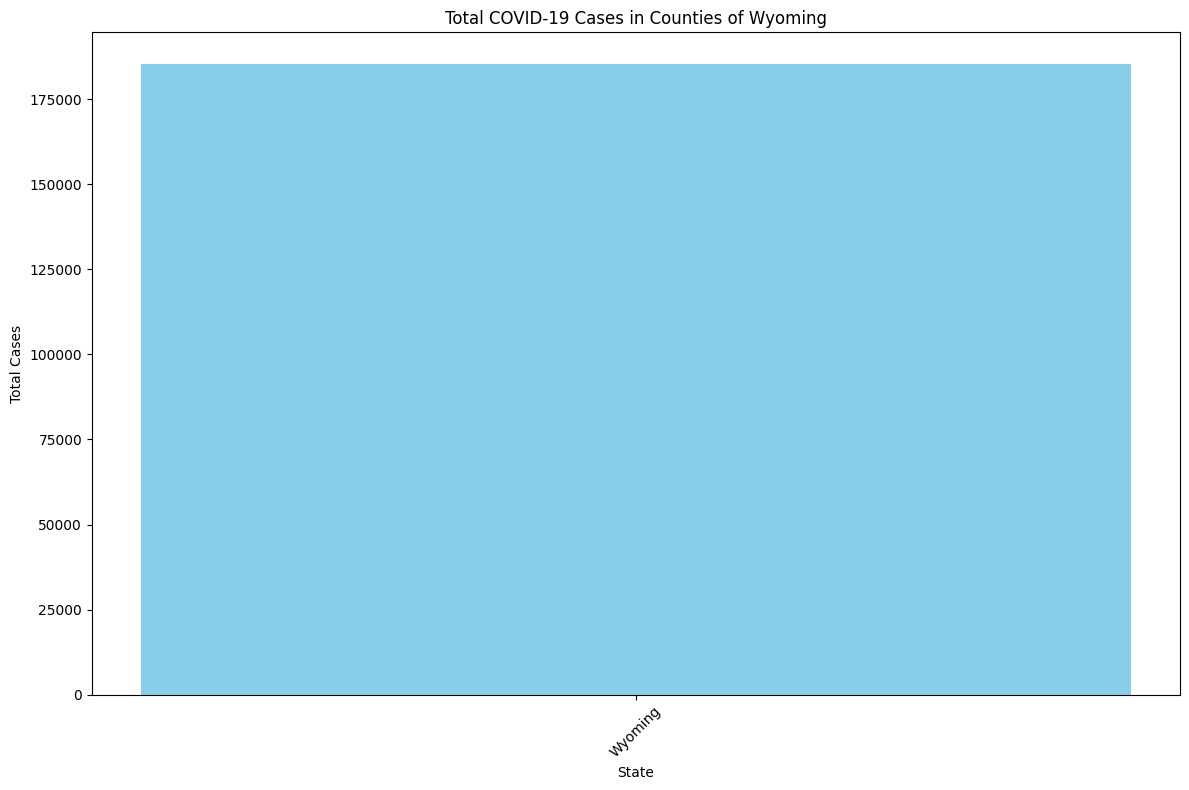

In [5]:
#%% viz 4
'''
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
'''

# California
state_name = 'California'

# Filter data
state_data = covid_df[covid_df['Province_State'] == state_name]

# Extract county data and sum together
county_names = state_data['Admin2']
county_cases = state_data.iloc[:, 11:].sum(axis=0)  # Sum cases across counties for each date

# Plot figure 
plt.figure(figsize=(12, 8))

plt.bar(state_name, county_cases, color='skyblue')  
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title(f'Total COVID-19 Cases in Counties of {state_name}')

plt.tight_layout()
plt.show()

# making sure it works for a second state
state_name = 'Wyoming'

# Filter data 
state_data = covid_df[covid_df['Province_State'] == state_name]

# Extract county data and sum together
county_names = state_data['Admin2']
county_cases = state_data.iloc[:, 11:].sum(axis=0)  # Sum cases across counties for each date

# Plotting figure
plt.figure(figsize=(12, 8))

plt.bar(state_name, county_cases, color='skyblue')  
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title(f'Total COVID-19 Cases in Counties of {state_name}')

plt.tight_layout()
plt.show()


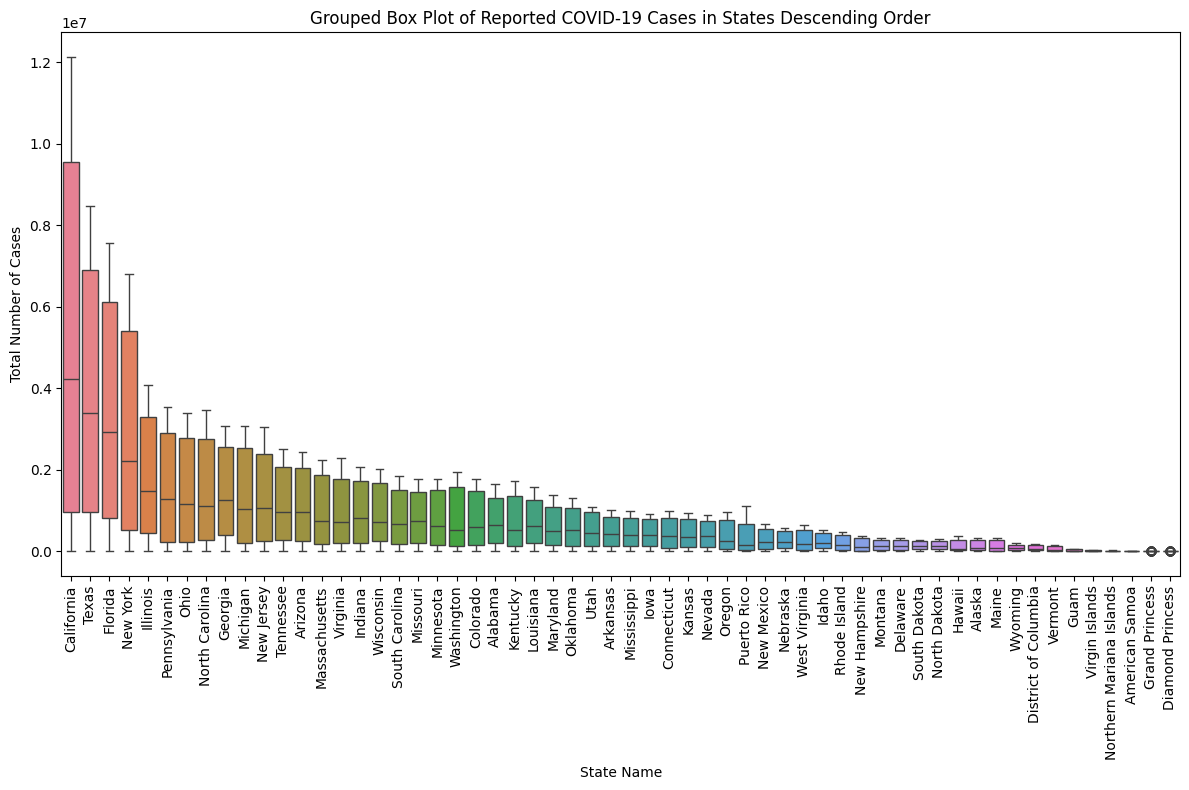

In [6]:
#%% extra credit (5 points)
'''
Use Seaborn to create a grouped box plot of all reported states. Each boxplot
should be a distinct state. Have the states ordered from most cases (FL) to fewest 
cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)
'''
import seaborn as sns

# find all the states data and sum the individual counties
state_cases = covid_df.groupby('Province_State').sum().iloc[:, 10:] 

# Sort states based on total cases 
#find in descending order biggest to smallest for the total number of cases 
sorted_states = state_cases.sum(axis=1).sort_values(ascending=False).index

# filter states so we can plot the individual states after sorting
sorted_state_cases = state_cases.loc[sorted_states]

# Plot and format 
plt.figure(figsize=(12, 8))
sns.boxplot(data=sorted_state_cases.T, width=0.8)
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Total Number of Cases')
plt.title('Grouped Box Plot of Reported COVID-19 Cases in States Descending Order')
plt.tight_layout()
plt.show()

In [7]:
#part of viz 2 trying to understand the shape of the utah and florida datasets 
utah_counties = covid_df[covid_df['Province_State'] == 'Utah']
florida_counties = covid_df[covid_df['Province_State'] == 'Florida']

print(utah_counties.shape)
print(florida_counties.shape)

(37, 1153)
(69, 1153)
